# Centroid Sectors Vetting Example

Normally the Centroid vetter takes a single TPF and generates in transit, out of transit, and difference images per transit. For transits around faint stars (MAGNITUDE SUGGESTION) it can be helpful to combine data from multiple sectors to increase the signal to noise. The CentroidSectors vetter takes multiple TPFs and for each one, combines images from each transit, creating one high snr difference image per sector. The series of sector difference images are then used to calculate the centroid offset and significance that it is on the target.  

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from exovetter.tce import Tce
from exovetter import vetters as vet
from exovetter import const as exo_const
from exovetter import utils
import lightkurve as lk
from astropy import units as u
import matplotlib.pyplot as plt
%matplotlib inline

## Setup and Vetting


In [3]:
# Good example: TIC 29991056
tce = Tce(period=4.9844*u.day, epoch=1330.387*u.day, epoch_offset=exo_const.btjd, depth=0.001162*exo_const.ppm, 
    duration=6.04*u.hr, snr=12.7918, target='TIC 29991056', sectors='1 | 2 | 3 | 4 | 5 | 6 | 7 | 8 | 9 | 10 | 11 | 12 | 13')

tce


{'period': <Quantity 4.9844 d>,
 'epoch': <Quantity 1330.387 d>,
 'epoch_offset': <Quantity -2457000. d>,
 'depth': <Quantity 1.162e-09>,
 'duration': <Quantity 6.04 h>,
 'snr': 12.7918,
 'target': 'TIC 29991056',
 'sectors': '1 | 2 | 3 | 4 | 5 | 6 | 7 | 8 | 9 | 10 | 11 | 12 | 13'}

In [8]:
# Download the relevent target pixel files for this tce
tpf_search = lk.search_tesscut(target="TIC 29991056")[0:13]
display(tpf_search)

tpfs = tpf_search.download_all(cutout_size=15)


RemoteServiceError: Connection Timeout Expired.  The timeout period elapsed while attempting to consume the pre-login handshake acknowledgement.  This could be because the pre-login handshake failed or the server was unable to respond back in time.  This failure occurred while attempting to connect to the routing destination. The duration spent while attempting to connect to the original server was - [Pre-Login] initialization=1; handshake=1; [Login] initialization=0; authentication=0; [Post-Login] complete=1;    The duration spent while attempting to connect to this server was - [Pre-Login] initialization=57624; handshake=32373; 

Running centroid on a single sector (06 for example) shows that the difference images on some transits are extreme. 

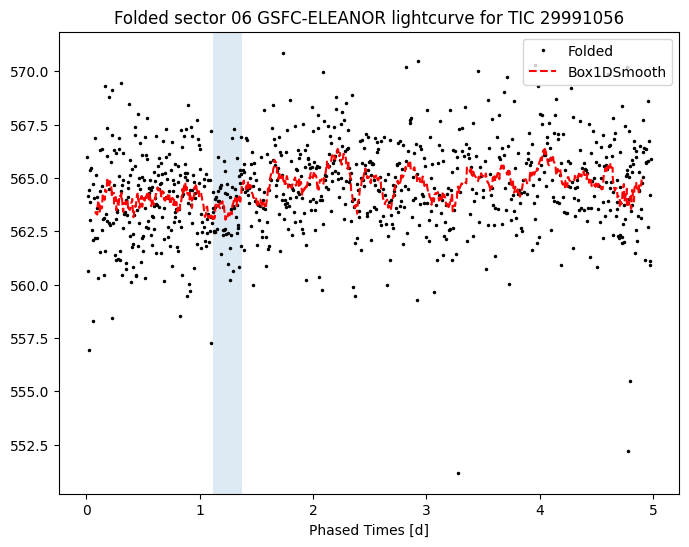

In [4]:
# # Quick visualization of the folded transit for sector 06
# sector_06_lc = lk.search_lightcurve(target="TIC 29991056")[5].download()
# sector_06_lc = sector_06_lc.remove_outliers(sigma_lower=8, sigma_upper=4)
# vet.VizTransits(folded_plot=True).run(tce, sector_06_lc)
# plt.title('Folded sector 06 GSFC-ELEANOR lightcurve for TIC 29991056')
# plt.show()

{'offset': 2.3630256286062243, 'significance': array([0.94920308])}

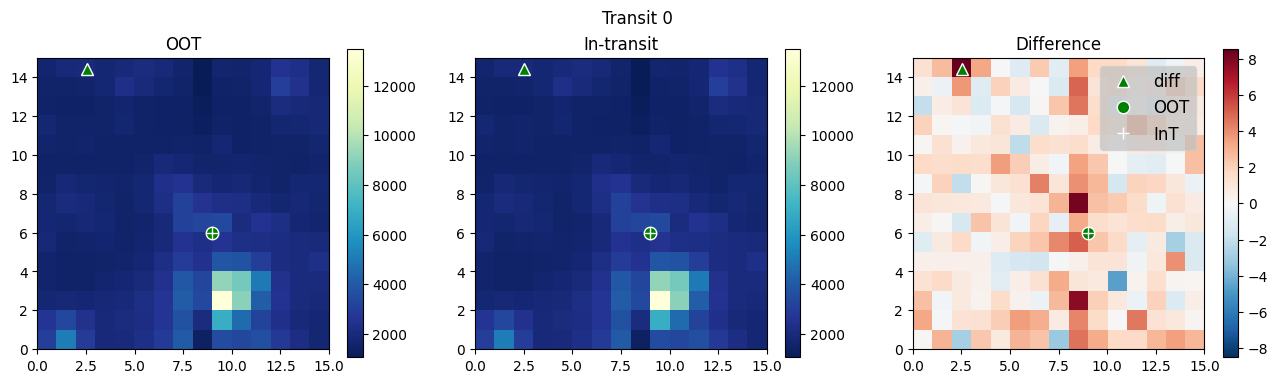

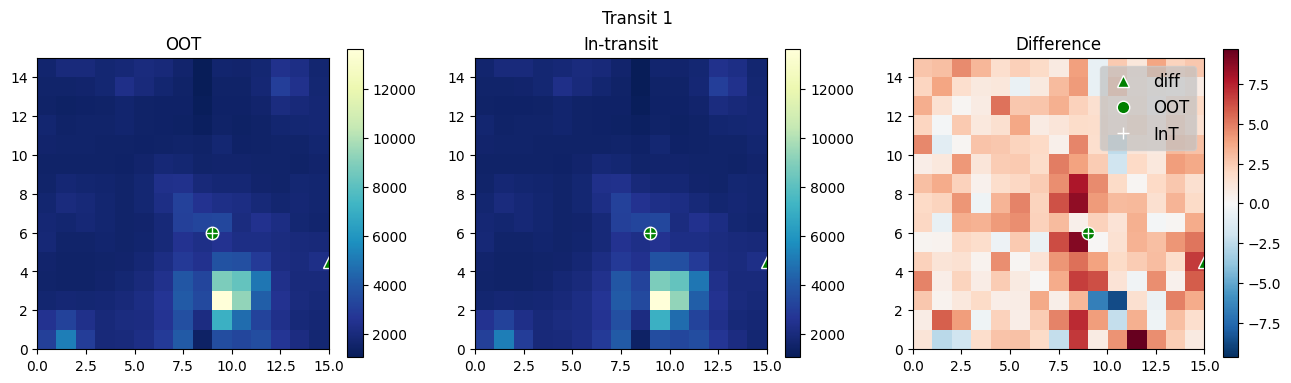

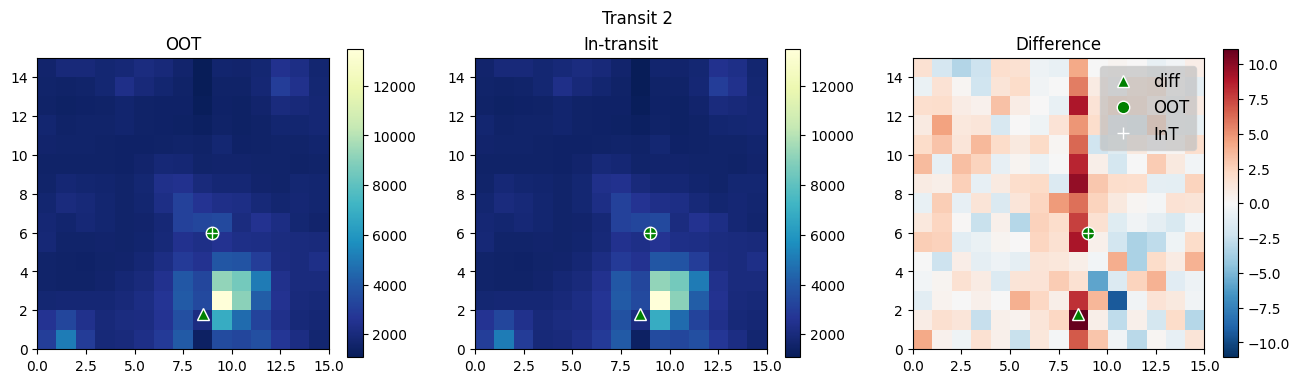

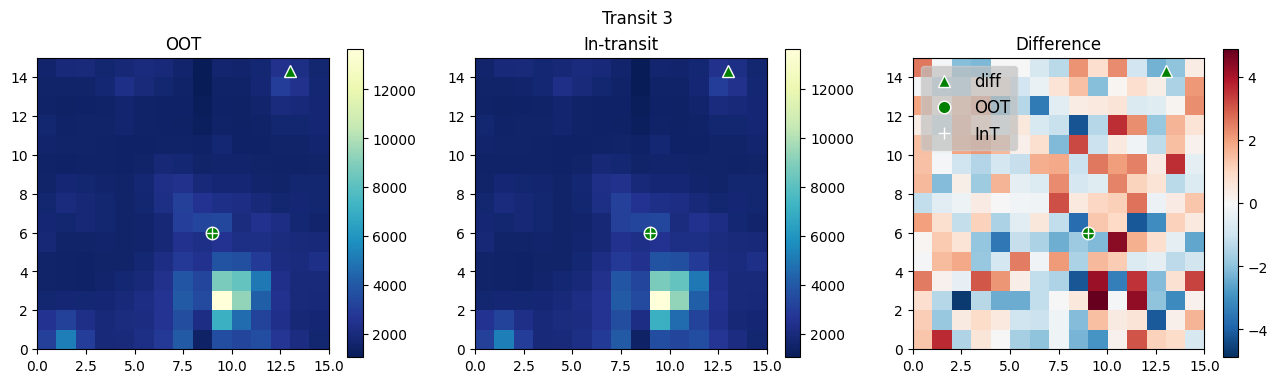

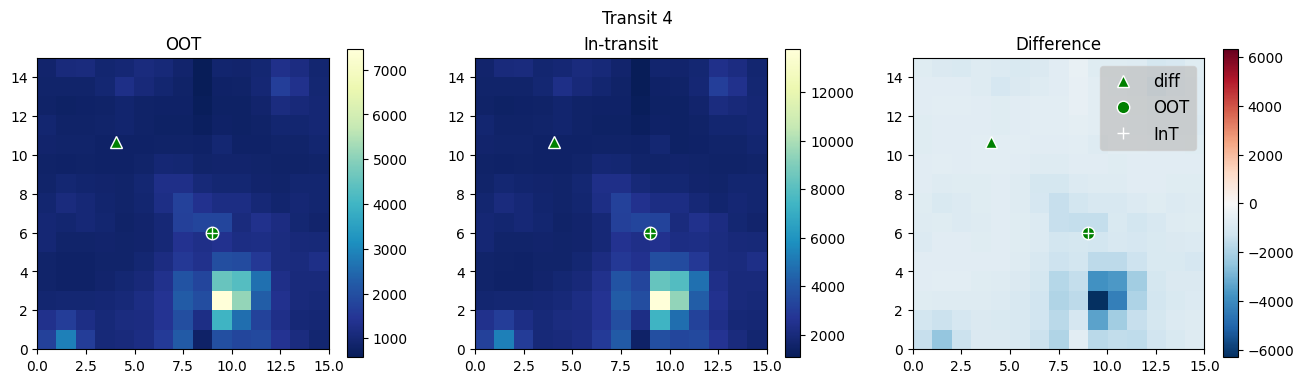

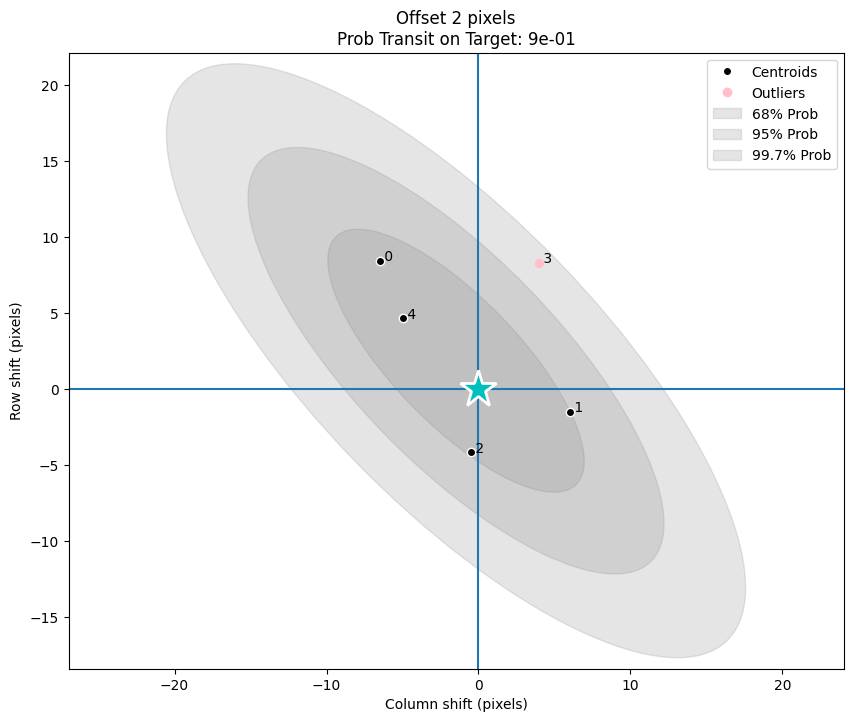

In [5]:
# # Normal centroid showing ambiguos difference images
# centroid = vet.Centroid()
# centroid.run(tce, tpfs[0], plot=True)

With CentroidSectors we can take the mean of each sector's in transit, out of transit, and subsequent difference images and use these to centroid vet on: 

{'offset': 1.898370143518893, 'significance': array([0.76279681])}

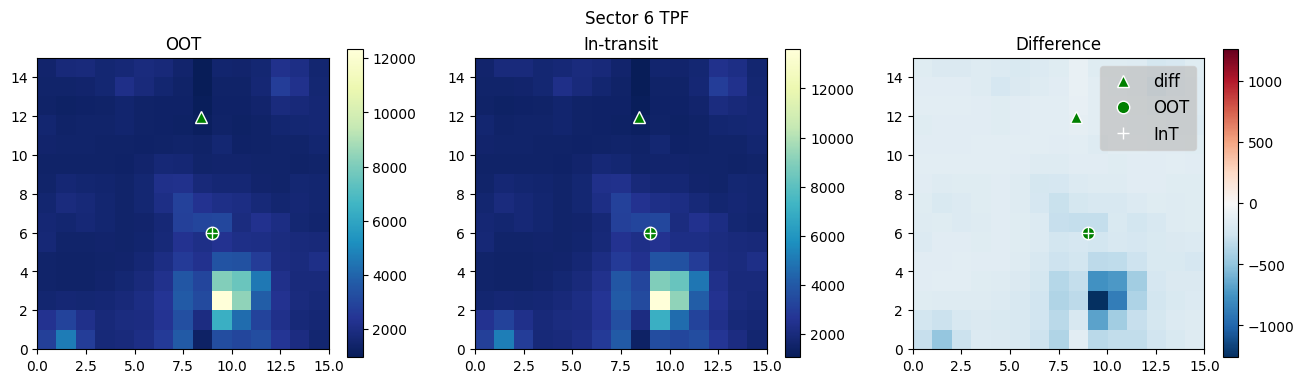

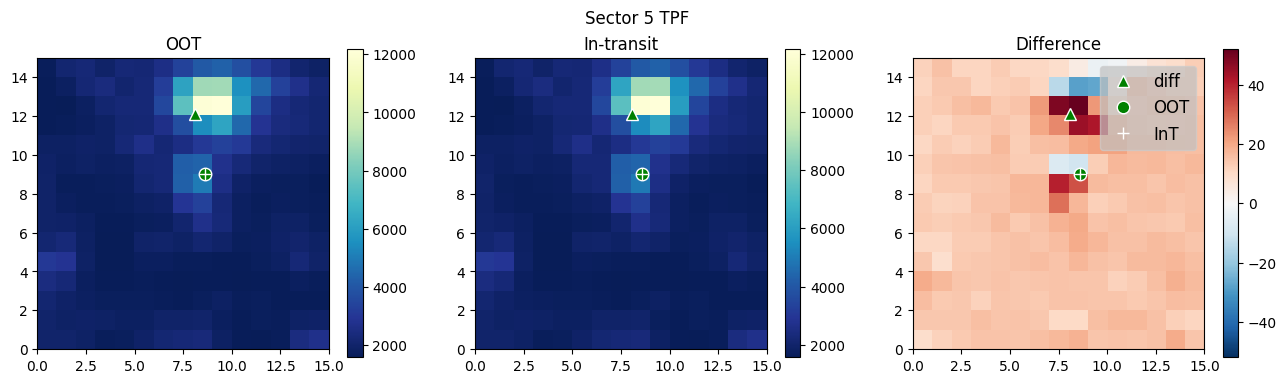

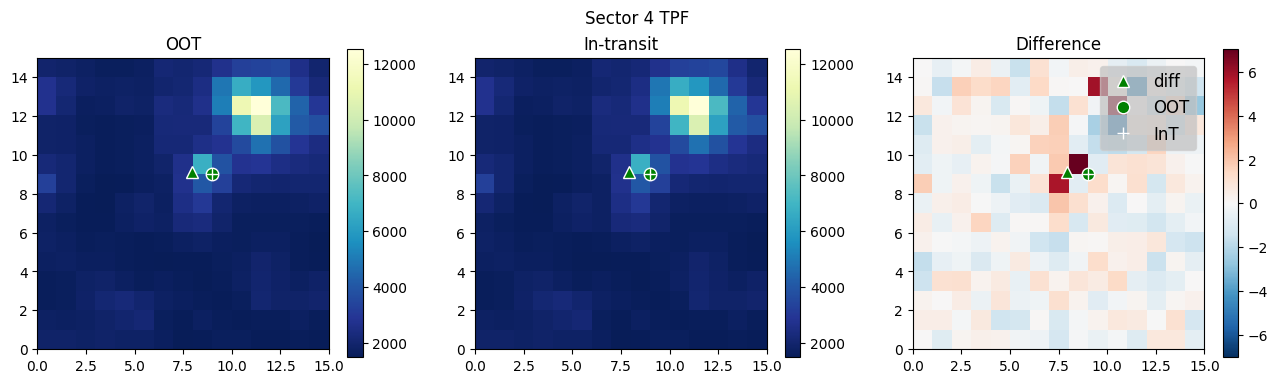

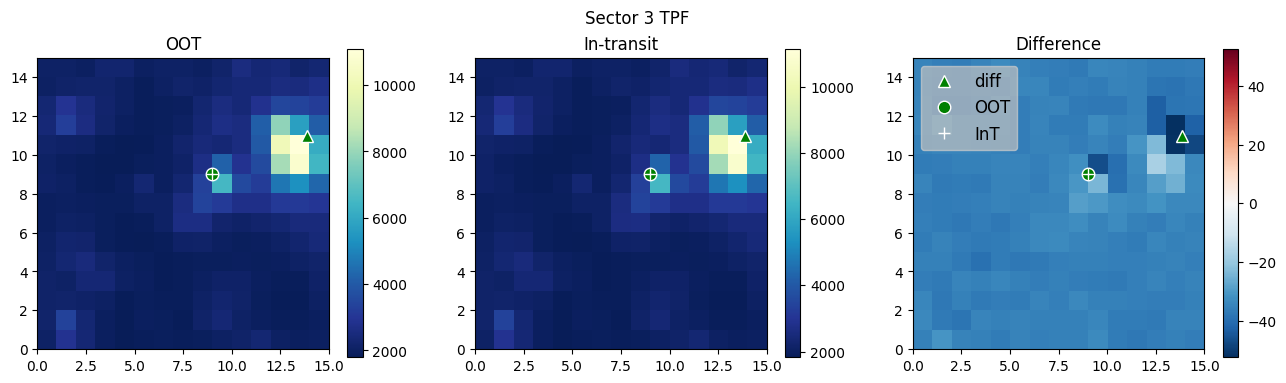

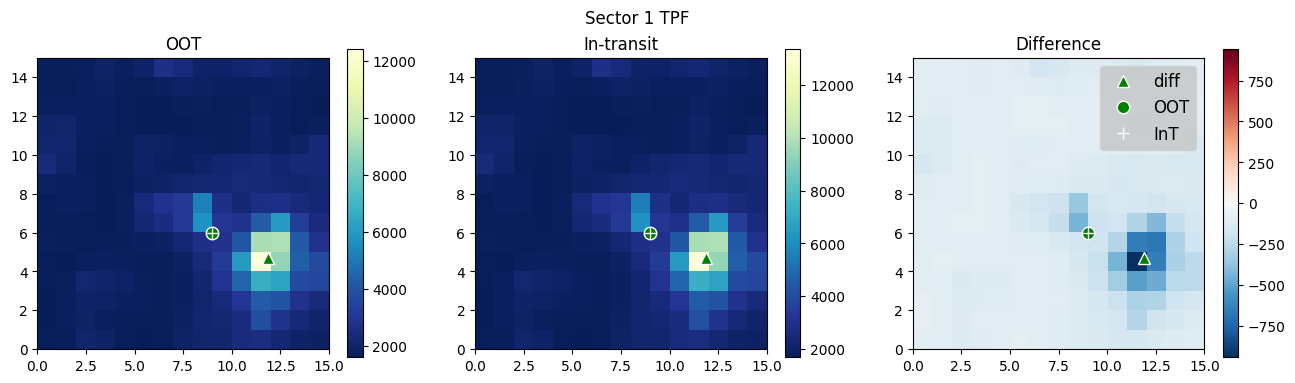

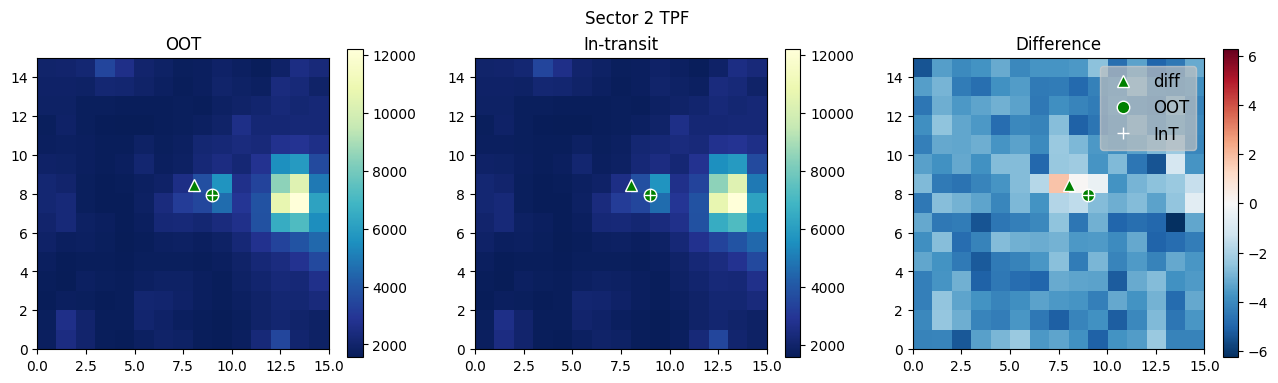

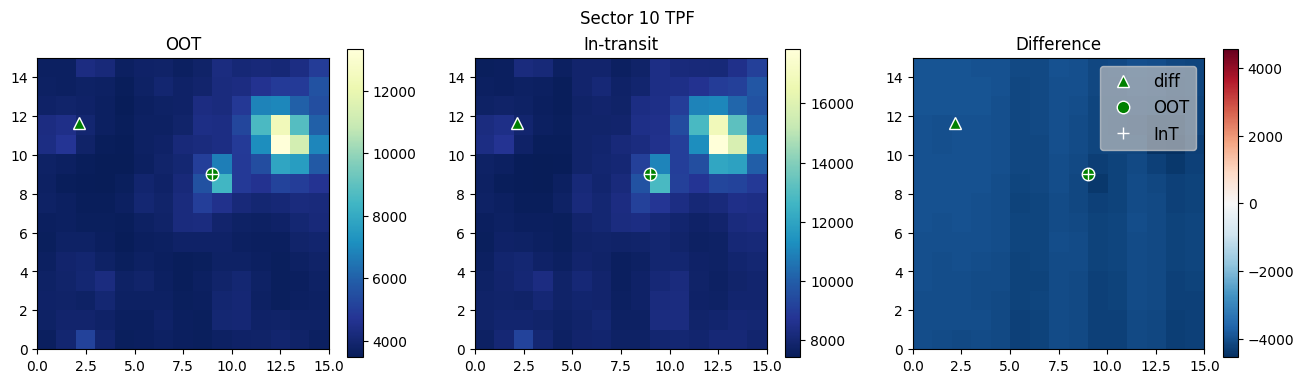

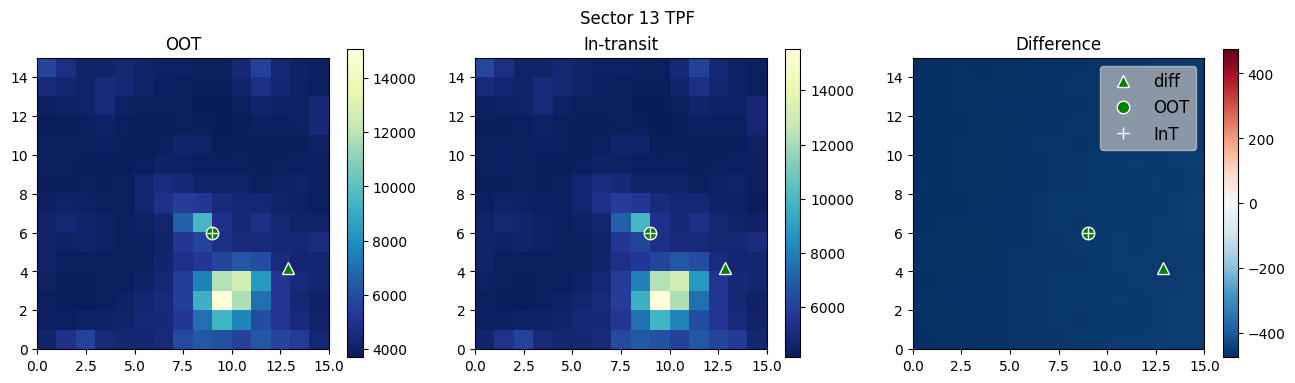

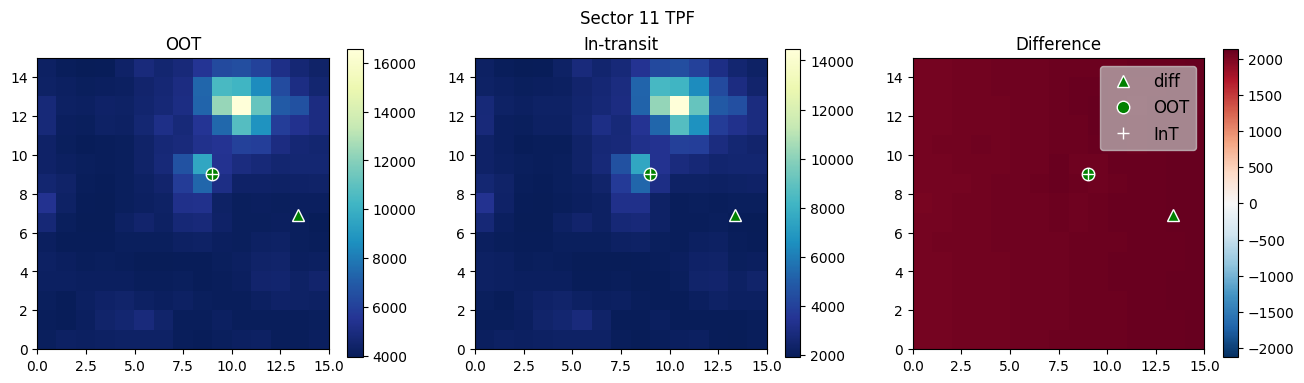

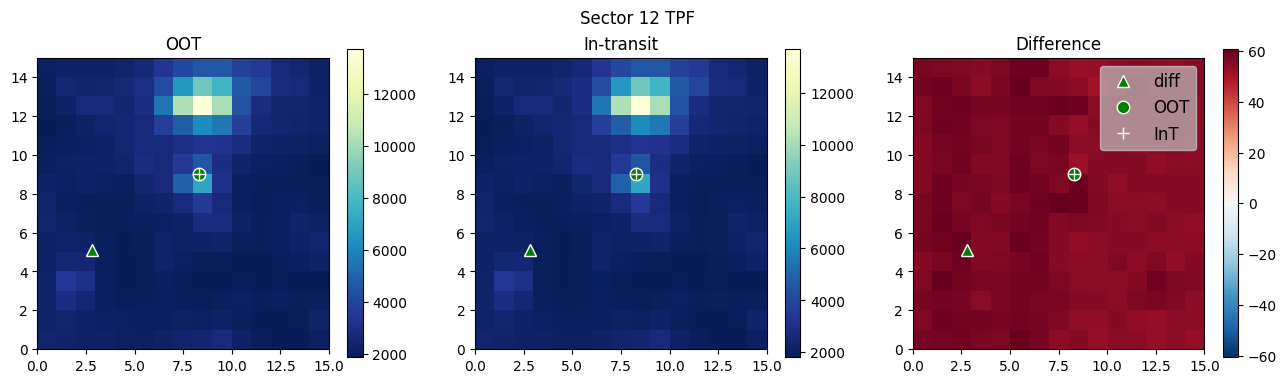

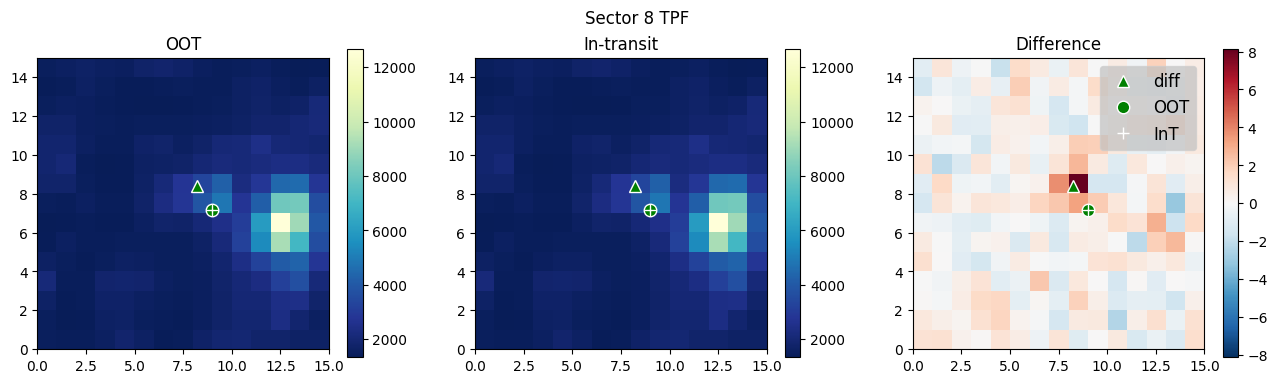

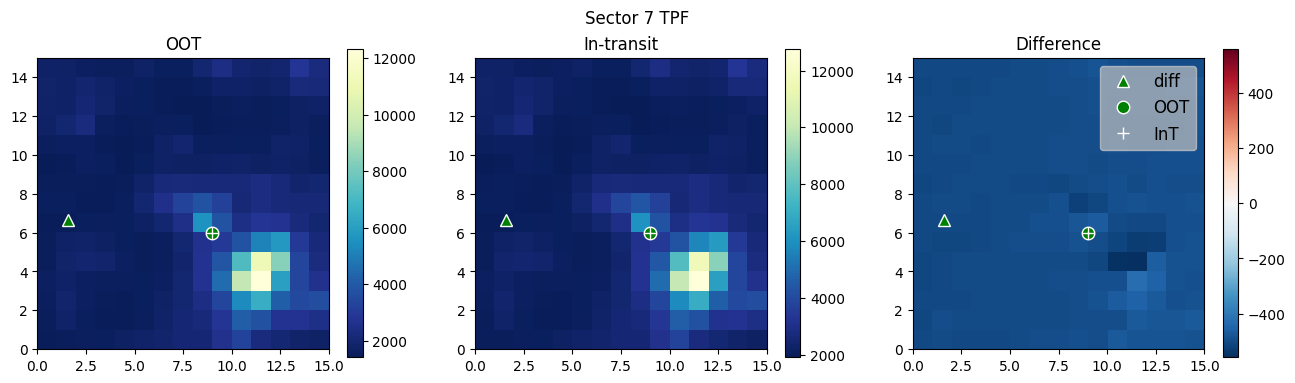

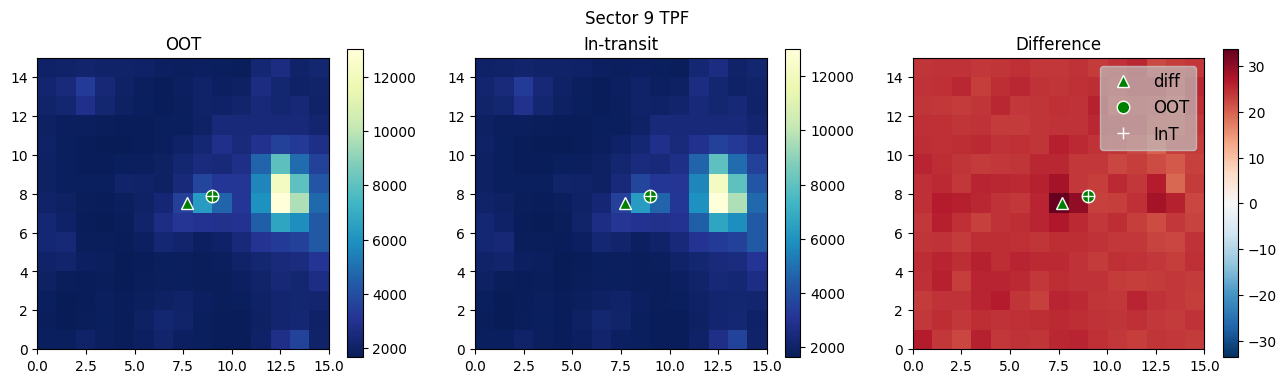

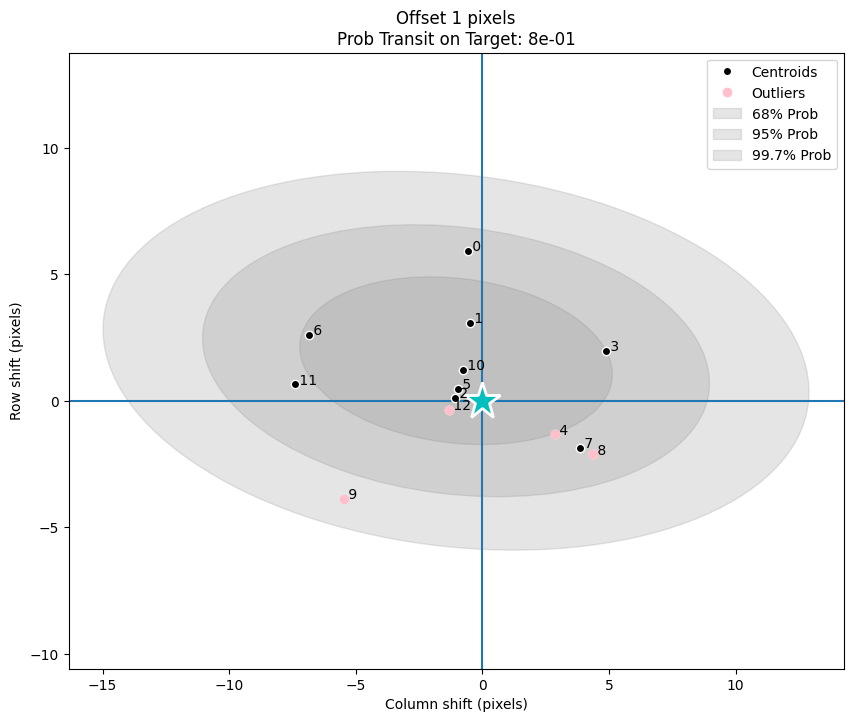

In [6]:
# Centroid on averaged transits per sector (no outlier removal)

#Maybe tpf.wcs.world_to_pixel() or something to rotate OOT and INTRANSIT images to all be the same?

centroid_sector = vet.CentroidSectors()
centroid_sector.run(tce, tpfs, plot=True)

Sometimes the mean of a sector's difference image can be dominated by one irregularly bright transit difference image caused by instrumental effects such as scattered light (see sector 06 transit 4).

To correct for this, we can supply a sigma argument to the CentroidSectors vetter in order to sigma clip the median of the difference images, rejecting those transits from the stack according to astropy.stats.sigma_clip.

removed transit 5 in sector 6 from stack
removed transit 3 in sector 5 from stack
removed transit 3 in sector 3 from stack
removed transit 1 in sector 1 from stack
removed transit 4 in sector 1 from stack
removed transit 3 in sector 2 from stack
removed transit 6 in sector 2 from stack
removed transit 1 in sector 10 from stack
removed transit 4 in sector 10 from stack
removed transit 1 in sector 13 from stack
removed transit 3 in sector 11 from stack
removed transit 3 in sector 7 from stack
removed transit 1 in sector 9 from stack
removed transit 4 in sector 9 from stack


{'offset': 0.5249661951710607, 'significance': array([0.92047607])}

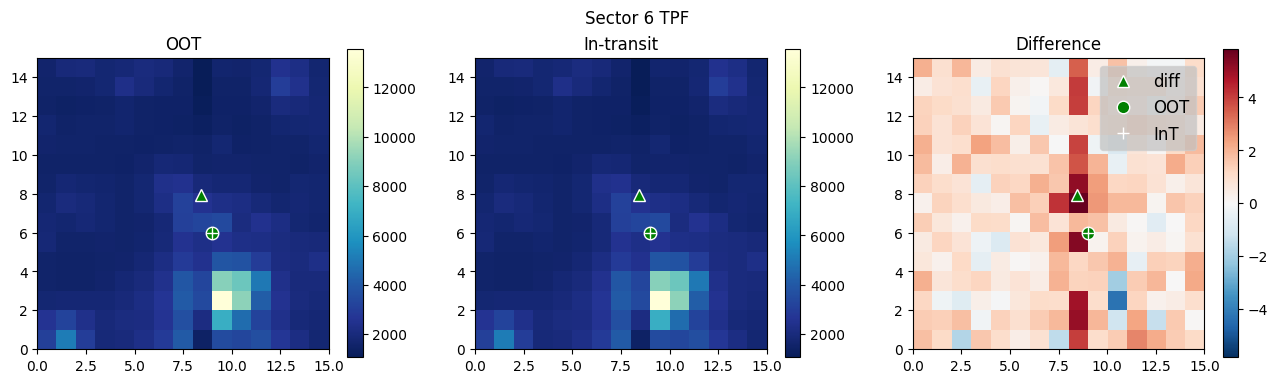

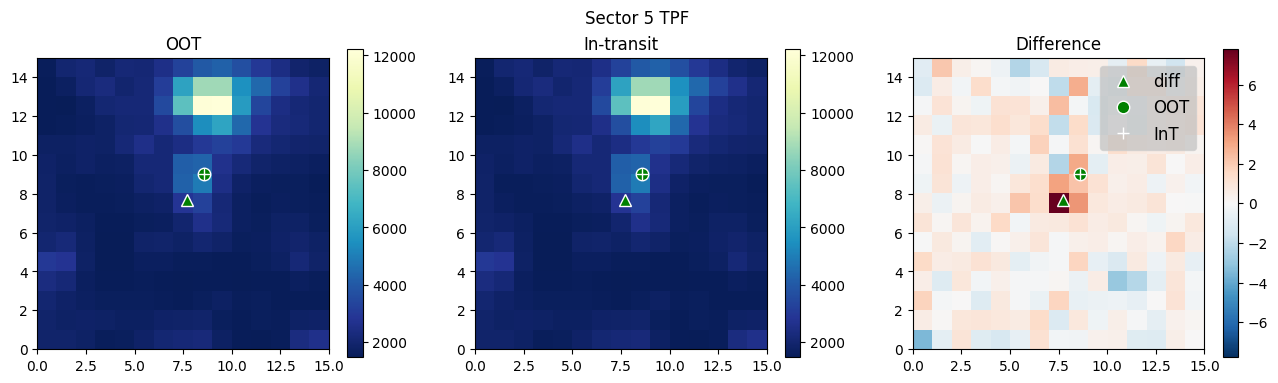

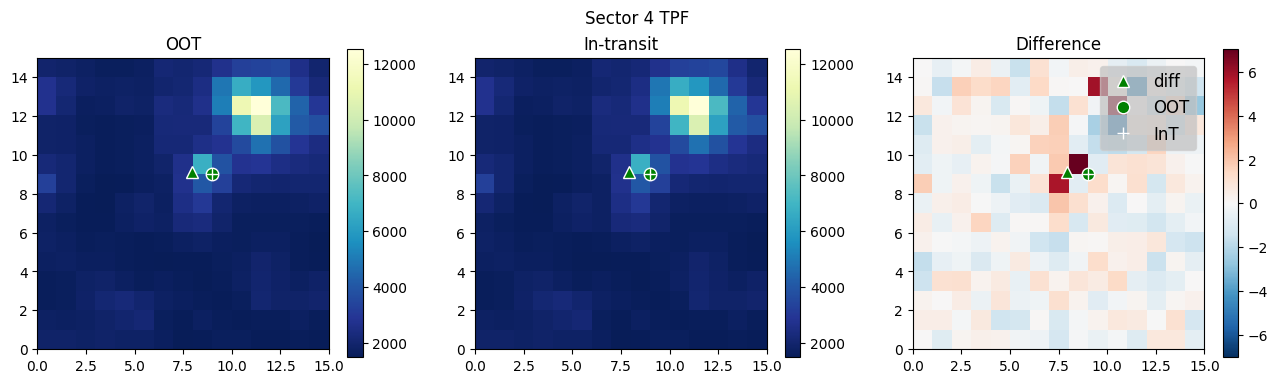

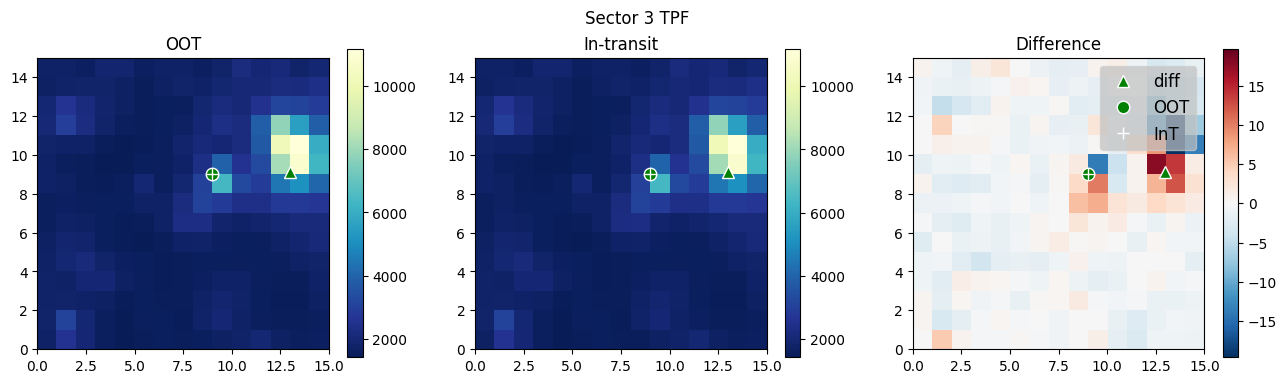

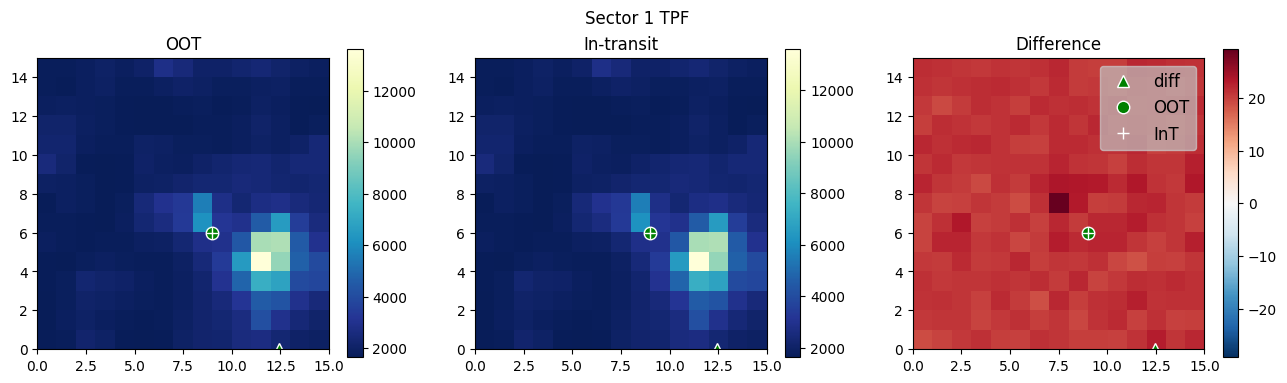

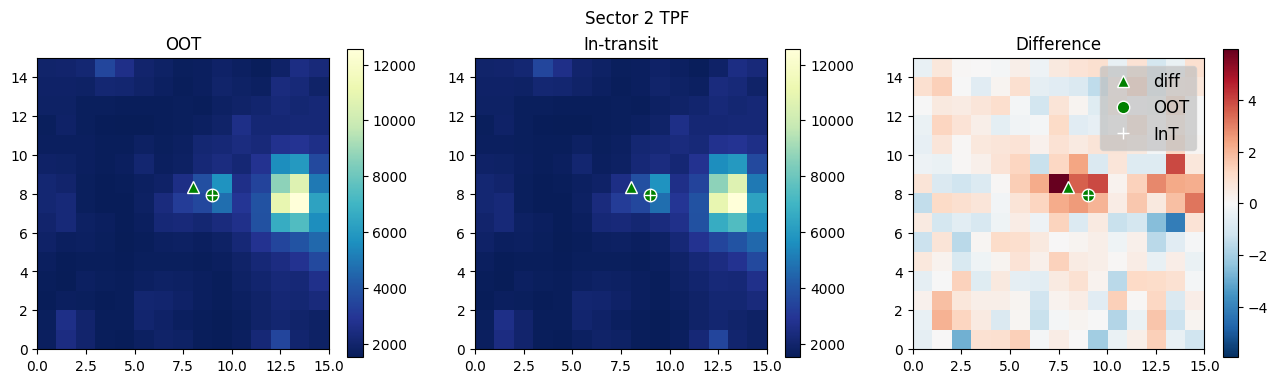

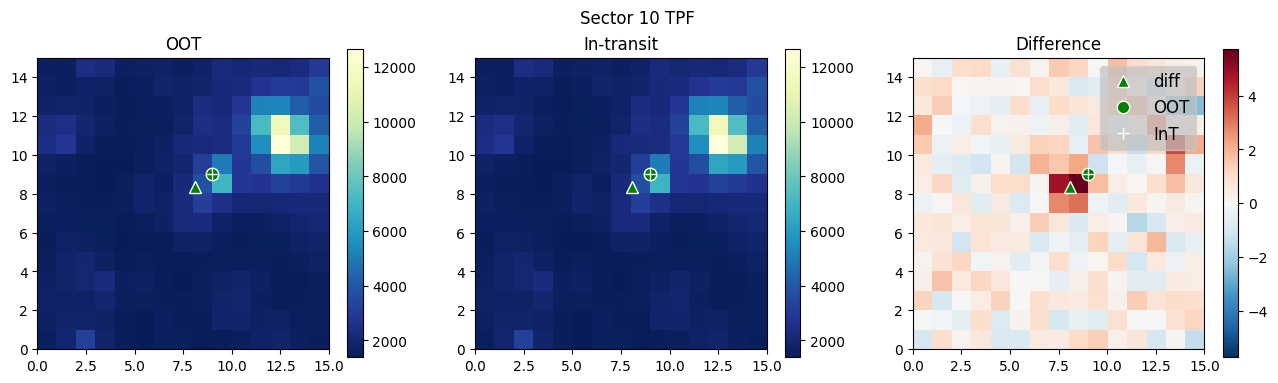

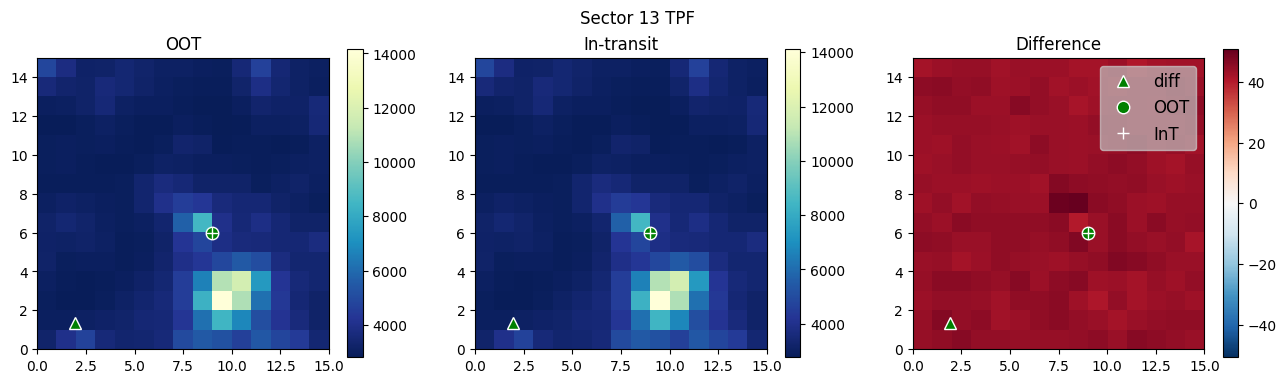

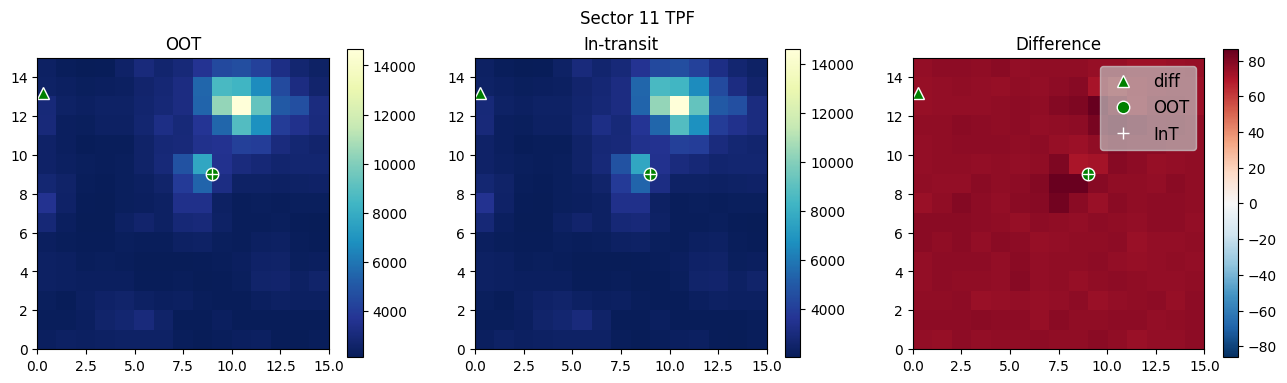

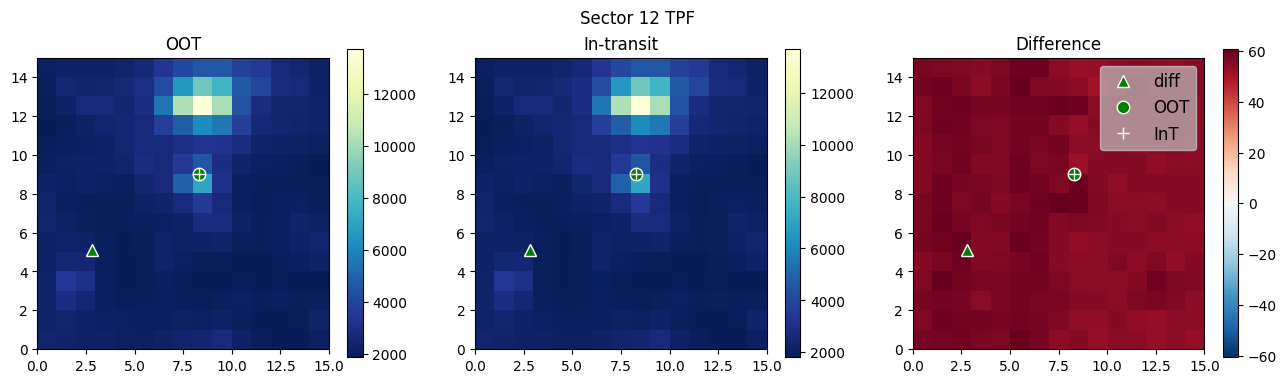

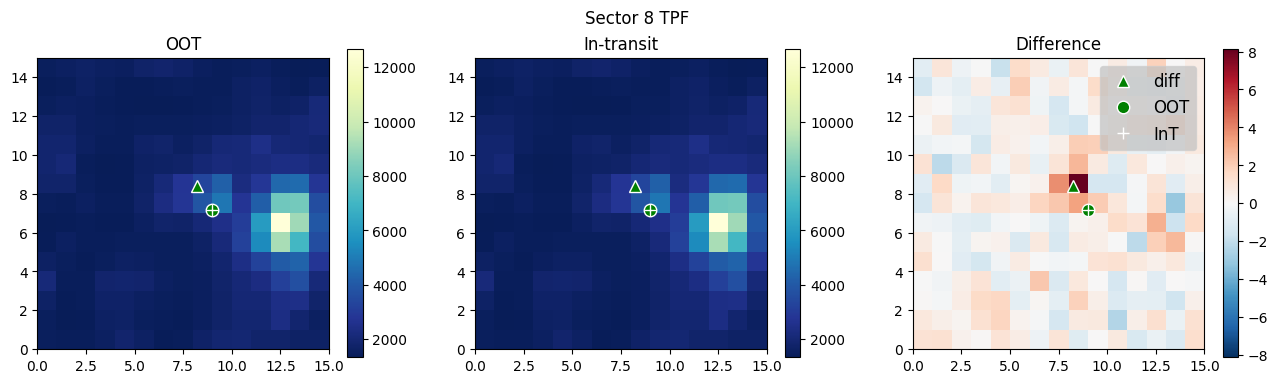

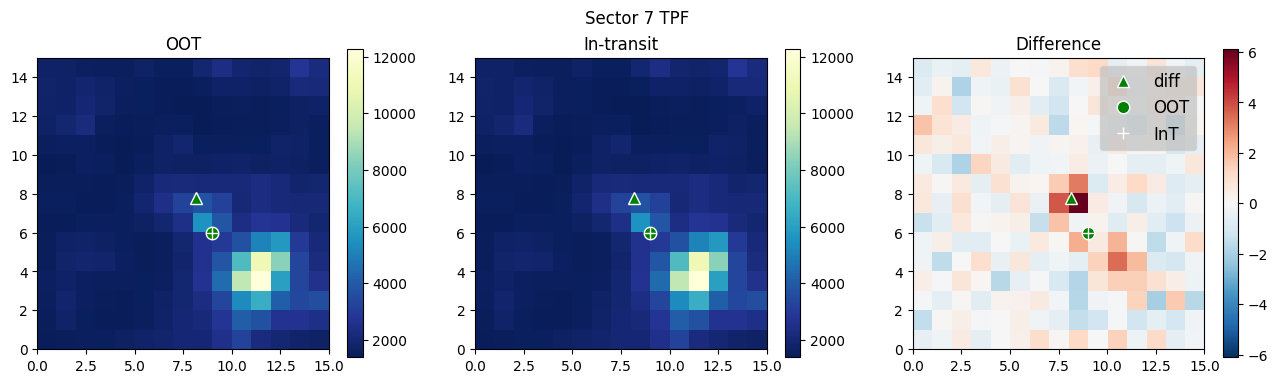

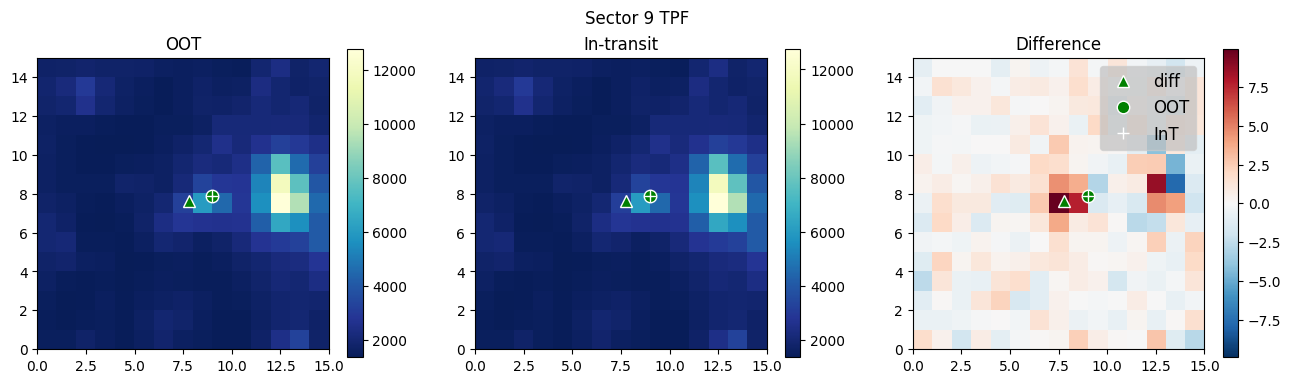

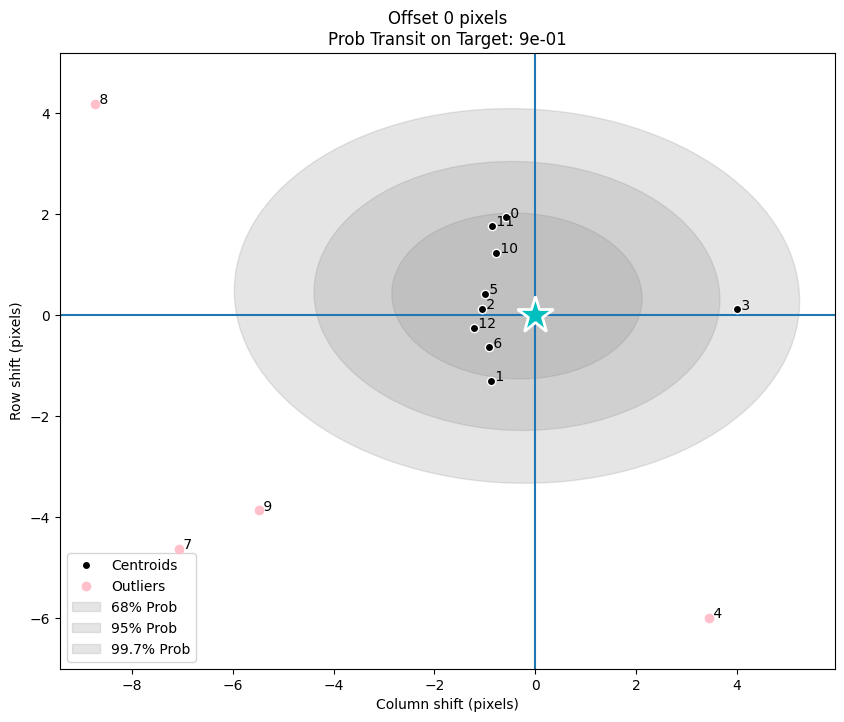

In [7]:
centroid_sector = vet.CentroidSectors()
centroid_sector.run(tce, tpfs, sigma=2, plot=True)